# Data Loading and DataFrame/DataSeries Generation

We're going to load all the image data into an xarray data series object.  We'll also do some image manipulation to make sure everything is the same size (via downsampling), and we'll try to grab some metadata out of the DICOM info.  This might get trickier as future data may be 

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,8)
import SimpleITK as sitk
import sys, os
import numpy as np
import pandas as pd
import xarray as xr
%matplotlib inline
import pickle as pkl
from mre.preprocessing import MREDataset
from mre.mask import add_elast_mask
%load_ext autoreload
%autoreload 2

In [66]:
full_data_dir = '/pghbio/dbmi/batmanlab/bpollack/predictElasticity/data/MRE/'
subjects = sorted([x for x in os.listdir(full_data_dir) if x.isdigit()])
subdir_names = ['SE00001','SE00002','SE00003','SE00004','SE00005','SE00006']
sequence_labels = ['T2SS', 'T1Pre', 'T1Pos', 'T2FR', 'elastMsk', 'elast']
extras = ['extra0', 'extra1', 'extra2', 'extra3']

In [67]:
mre_ds = MREDataset(full_data_dir, 256, 256, 4, n_extras=4)

In [73]:
mre_ds.load_data(norm=False)

In [74]:
ds = add_elast_mask(mre_ds.ds, 'extra0')

In [75]:
ds.subject

<xarray.DataArray 'subject' (subject: 50)>
array(['148', '162', '163', '178', '189', '195', '197', '218', '220', '222',
       '239', '264', '280', '289', '292', '295', '296', '299', '302', '331',
       '332', '343', '350', '351', '354', '357', '358', '360', '361', '363',
       '365', '368', '370', '371', '372', '375', '380', '381', '383', '386',
       '388', '391', '394', '396', '399', '402', '403', '404', '405', '406'],
      dtype='<U3')
Coordinates:
  * subject  (subject) <U3 '148' '162' '163' '178' ... '403' '404' '405' '406'

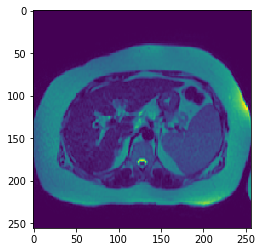

In [78]:
plt.imshow(ds.sel(subject=subj, sequence='T2SS', z=slc).image.values)

Text(0.5,1,'T2FR')

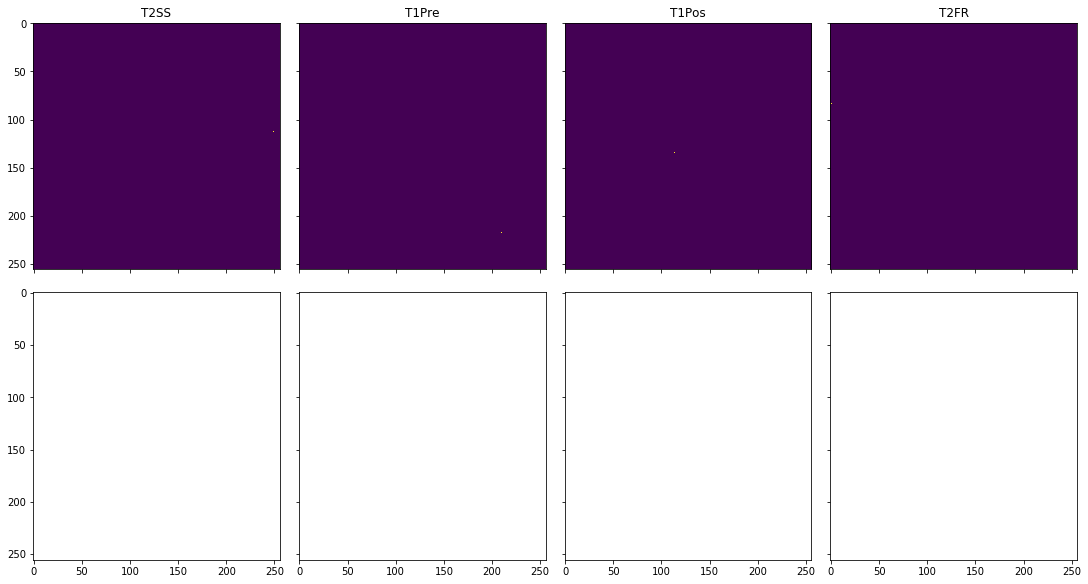

In [55]:
fig, axs = plt.subplots(2, 4, constrained_layout=True, figsize=(15,8), sharex=True, sharey=True)
axs = axs.flatten()
subj = '365'
slc = 0
axs[0].imshow(ds.sel(subject=subj, sequence='T2SS', z=slc).image)
axs[0].set_title('T2SS')
axs[1].imshow(ds.sel(subject=subj, sequence='T1Pre', z=slc).image)
axs[1].set_title('T1Pre')
axs[2].imshow(ds.sel(subject=subj, sequence='T1Pos', z=slc).image)
axs[2].set_title('T1Pos')
axs[3].imshow(ds.sel(subject=subj, sequence='T2FR', z=slc).image)
axs[3].set_title('T2FR')
#axs[4].imshow(ds.sel(subject=subj, sequence='elast', z=slc).image)
#axs[4].set_title('elast')
#axs[5].imshow(ds.sel(subject=subj, sequence='elastMsk', z=slc).image)
#axs[5].set_title('elastMsk')
#axs[6].imshow(ds.sel(subject=subj, sequence='msk', z=slc).image)
#axs[6].set_title('msk')
#axs[7].imshow(ds.sel(subject=subj, sequence='msk', z=slc).image*ds.sel(subject=subj, sequence='elast', z=slc).image)
#axs[7].set_title('elast*msk')

In [71]:
#ds = pkl.load(open(full_data_dir+'mre_ds_transform_2.p', 'rb'))
#ds = mre_ds.ds

/pghbio/dbmi/batmanlab/bpollack/predictElasticity/xarray/xarray/plot/facetgrid.py:117: UserWarning: Ignoring col_wrap since both col and row were passed
  warnings.warn('Ignoring col_wrap since both col and row '


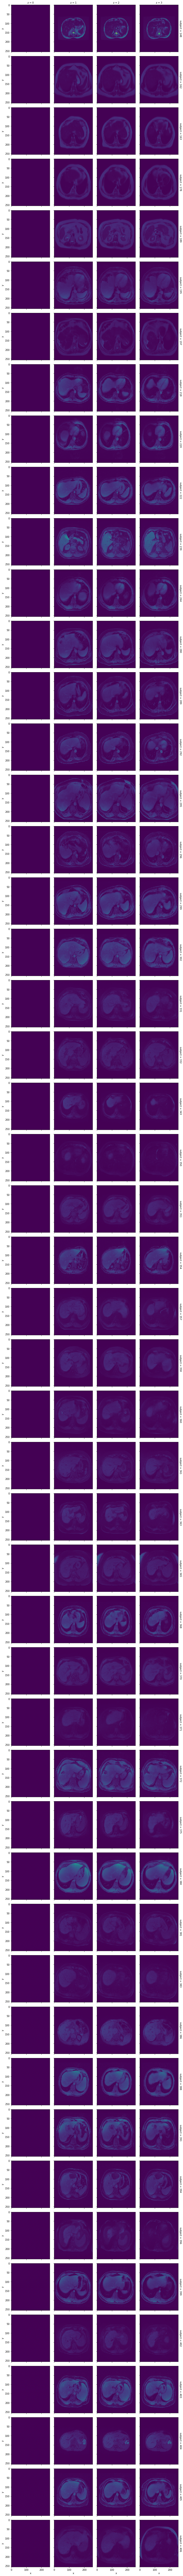

In [10]:
from matplotlib import colors
plot_args = {'size':3, 'yincrease':False, 'add_colorbar':False, 'aspect':0.8, 'col_wrap':4}
#plot_args = {'size':3, 'aspect':0.8, 'col_wrap':4}
ds.sel(sequence='T1Pre').image.plot(col='z', row='subject', **plot_args)
#plt.show()
#for ax in plt.gca():
#for ax in g.axes.flat:
#    print(ax.axes)
#    print(ax.get_images())
#a = plt.gca()
#img = a.get_images()
#print(img)
#vmin = img.get_array().min()
#vmax = img.get_array().max()
#img.set_clim(vmin, vmax)
#plt.show()
#xr.plot.FacetGrid(ds.sel(sequence='T1Pre').image, col='z', row='subject', **plot_args).map_dataarray(xr.plot.imshow, 'x', 'y')

AttributeError: 'Figure' object has no attribute 'get_images'

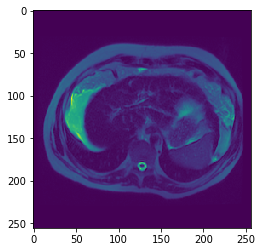

In [37]:
fig,ax = plt.subplots()
ax.imshow(ds.sel(sequence='T2SS', z=0, subject='350').image)
a = plt.gcf().get_images()[0]

In [36]:
a.get_array().max()

1751.0

In [74]:
pkl.dump(ds, open(full_data_dir+'mre_ds_preprocess_1.p', 'wb'), protocol=-1)

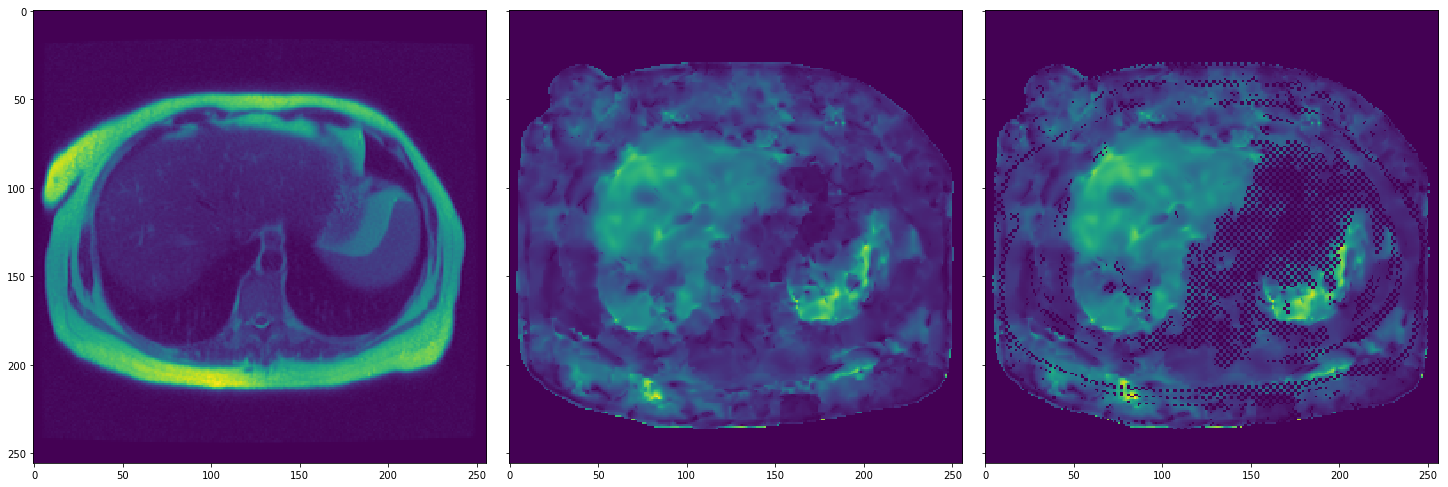

In [59]:
#ds.sel(subject='365', sequence='T2SS').std(dim='slices').images.plot(size=10, yincrease=False)
fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(20,10), sharex=True, sharey=True)
axs = axs.flatten()
subj = '405'
z = 2
axs[0].imshow(ds.sel(subject=subj, sequence='T1Pos', z=z).image)
axs[1].imshow(ds.sel(subject=subj, sequence='elast', z=z).image)
axs[2].imshow(ds.sel(subject=subj, sequence='elastMsk', z=z).image)

#fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(20,10), sharex=True, sharey=True)
#axs = axs.flatten()
#axs[0].imshow(ds_new.sel(subject=subj, sequence='T1Pos', z=z).image)
#axs[1].imshow(ds_new.sel(subject=subj, sequence='elast', z=z).image)
#axs[2].imshow(ds_new.sel(subject=subj, sequence='elastMsk', z=z).image)
#ds.sel(subject='365', sequence='elast', slices=1).images.plot(yincrease=False, robust=False, ax=axs[1])
#ds.sel(subject='365', sequence='elastMsk', slices=1).images.plot(yincrease=False, robust=False, ax=axs[2])

In [22]:
plot_args = {'size':3, 'robust':True, 'yincrease':False, 'add_colorbar':False, 'aspect':0.8, 'col_wrap':4}

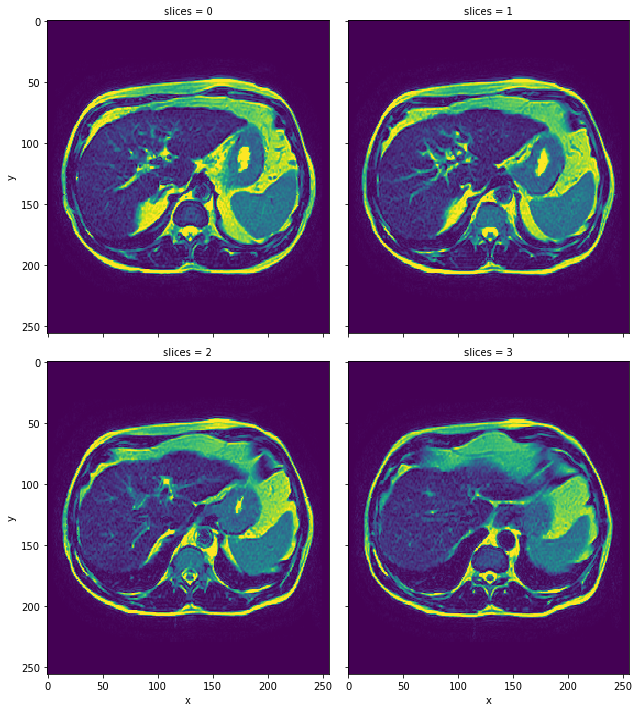

In [23]:
ds.sel(sequence='T2SS', subject='370').images.plot(col='slices', **plot_args)

In [ ]:
main_seq = ['T2SS', 'T1Pre', 'T1Pos', 'T2FR',]
ds_tmp = ds.sel(z=0, sequence=main_seq)
fig, axs = plt.subplots(len(ds_tmp.subject), 4, constrained_layout=True, figsize=(15,4*len(ds_tmp.subject)), sharex=True, sharey=True)
for i,subj in enumerate(ds_tmp.subject):
    for j,seq in enumerate(main_seq):
        axs[i][j].imshow(ds_tmp.sel(sequence=seq, subject=subj).image)
        plt.xticks([])
        plt.yticks([])
        if i==0:
            axs[i][j].set_title(f'{seq}', size=18)
        if j==0:
            axs[i][j].set_ylabel(f'{subj.values}', size=18)

In [ ]:
ds.ages.plot.hist()

In [ ]:
str(ds.subject[0].values)